### Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
#### Problem Statement: 
1. Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
2. Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:
Number of columns: 23


Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [45]:
# Count of Null values across each Column
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [46]:
 #Describe Method says the statistics of our data like Maxvalue,Mean,Count..etc for every column
 
df.describe()     

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


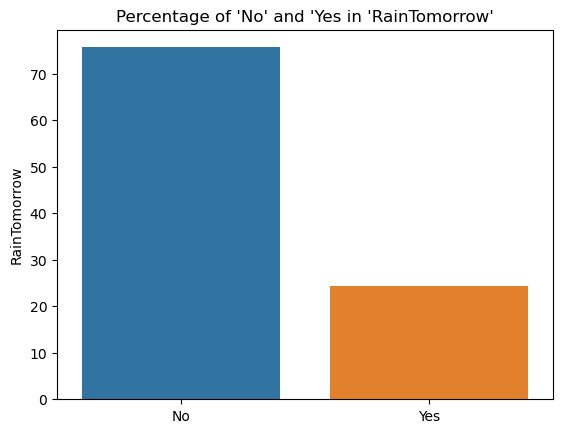

In [47]:
#Counting the Count of 'NO' and 'YES' from the column RainTomorrow 
RT = df["RainTomorrow"].value_counts(normalize = True)

sns.barplot(x = RT.index, y = RT*100).set_title("Percentage of 'No' and 'Yes in 'RainTomorrow'");

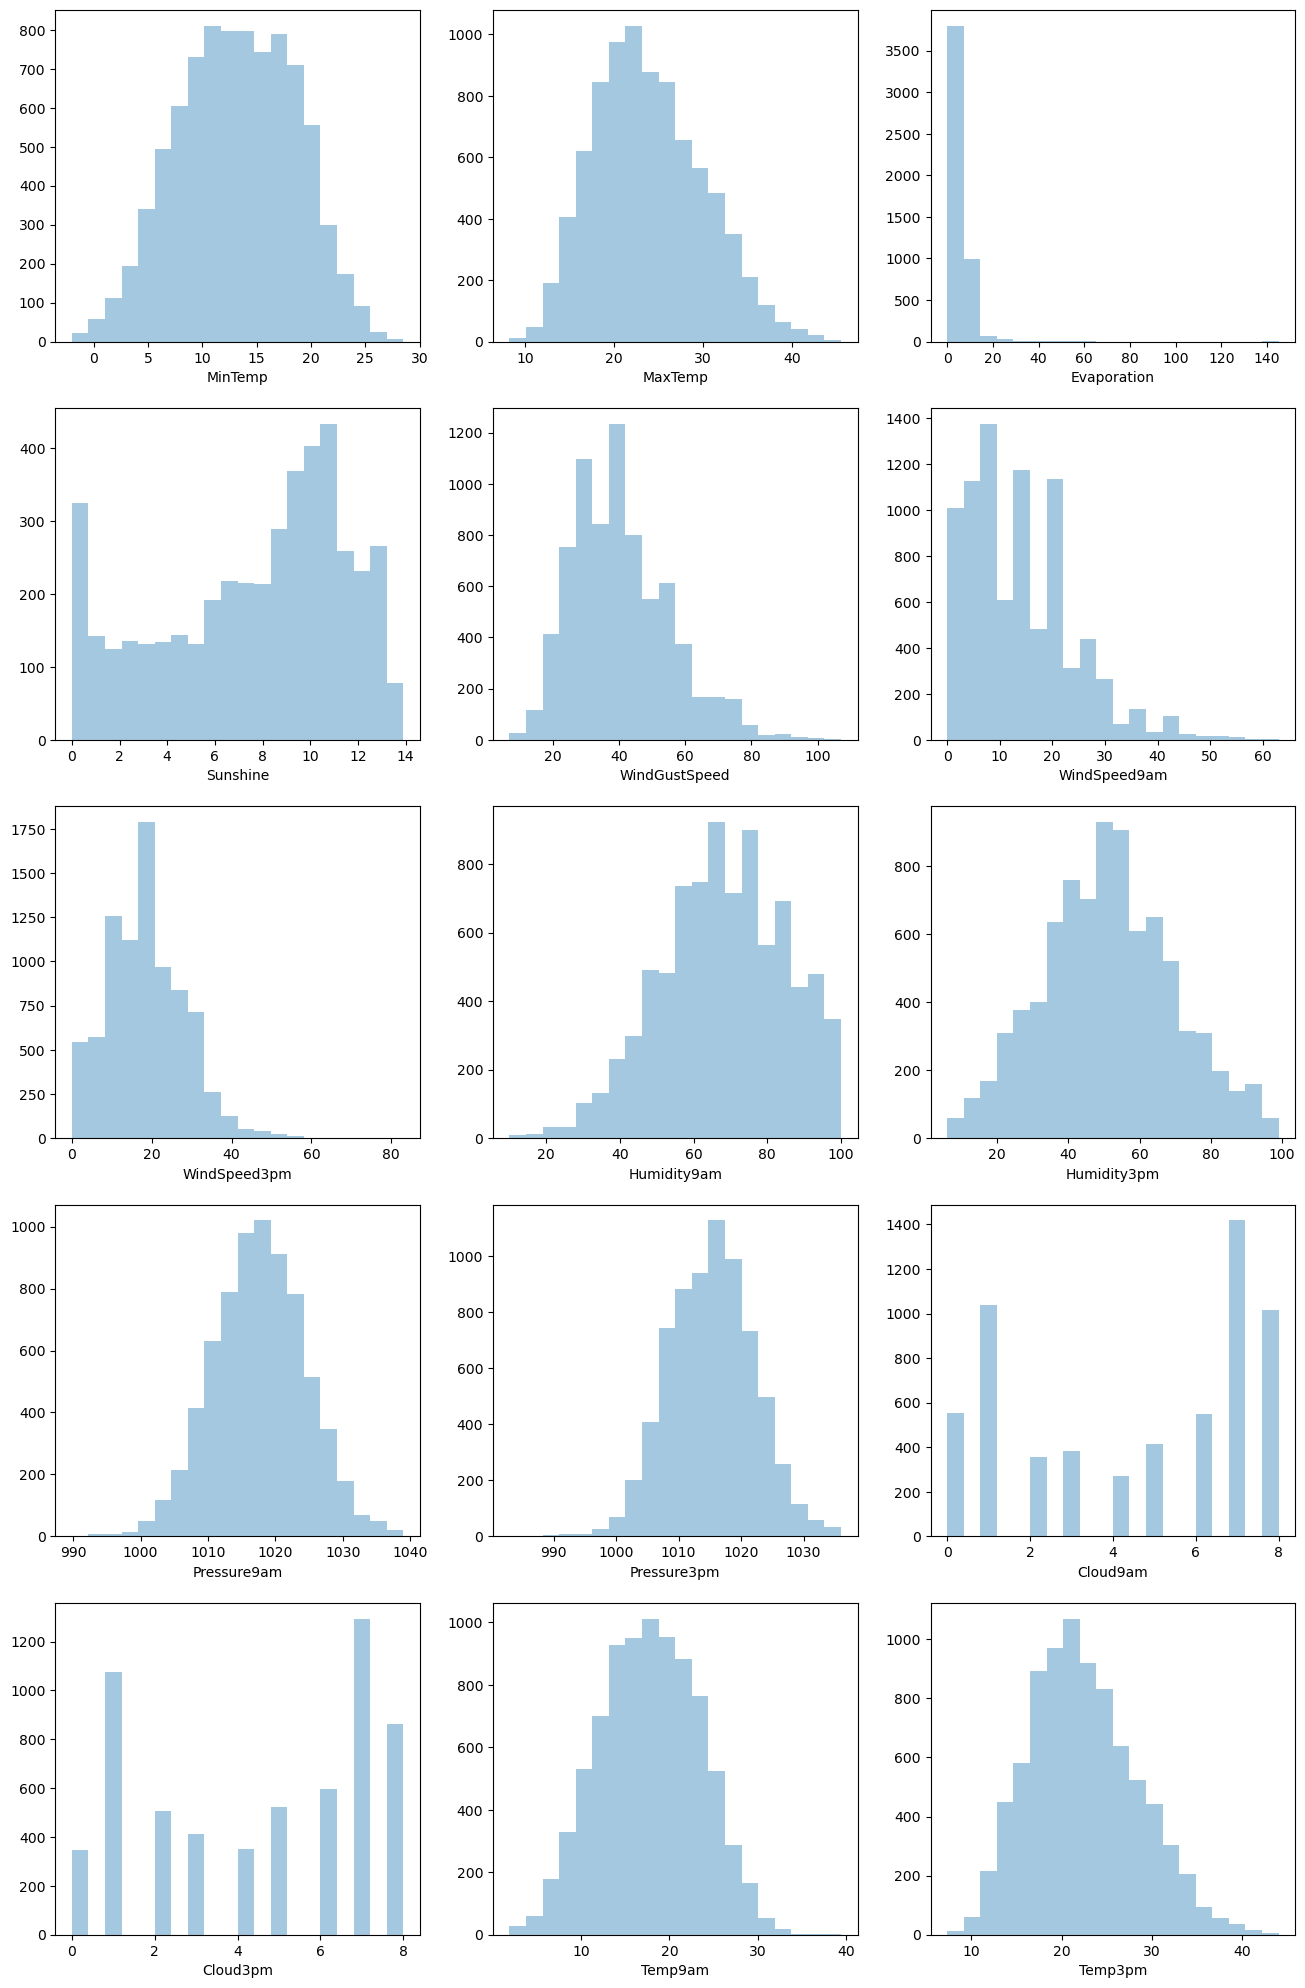

In [48]:
n_rows=5
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols);
fig.set_size_inches((16, 25))

#Considering the columns which are useful for evaluation 
dt = df.iloc[:, [2, 3, 5, 6, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

for i, column in enumerate(dt.columns):
    sns.distplot(df[column],ax=axes[i//n_cols,i%n_cols], kde = False, bins = 20);

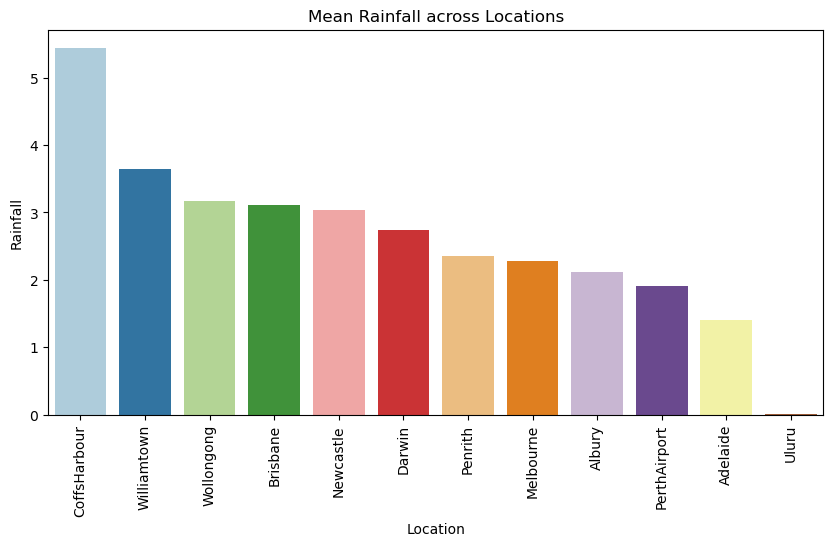

In [49]:
RF_loc = df.groupby('Location')["Rainfall"].mean().sort_values(ascending = False)

fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)
sns.barplot(x = RF_loc.index, y = RF_loc,
            palette = sns.color_palette("Paired")).\
            set_title("Mean Rainfall across Locations");

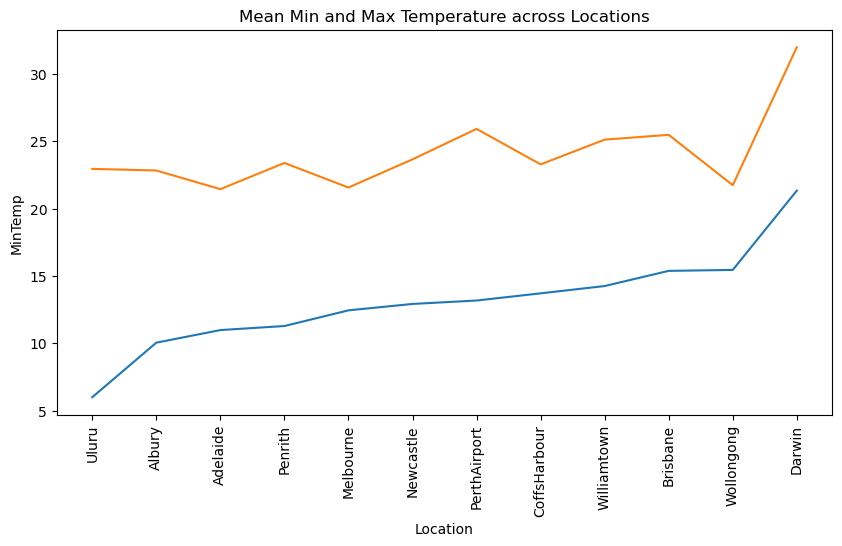

In [50]:
MinTemp_loc = df.groupby('Location')["MinTemp"].mean().sort_values()
MaxTemp_loc = df.groupby('Location')["MaxTemp"].mean().sort_values()

fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)
sns.lineplot(x = MinTemp_loc.index, y = MinTemp_loc);
sns.lineplot(x = MaxTemp_loc.index, y = MaxTemp_loc).\
            set_title("Mean Min and Max Temperature across Locations");

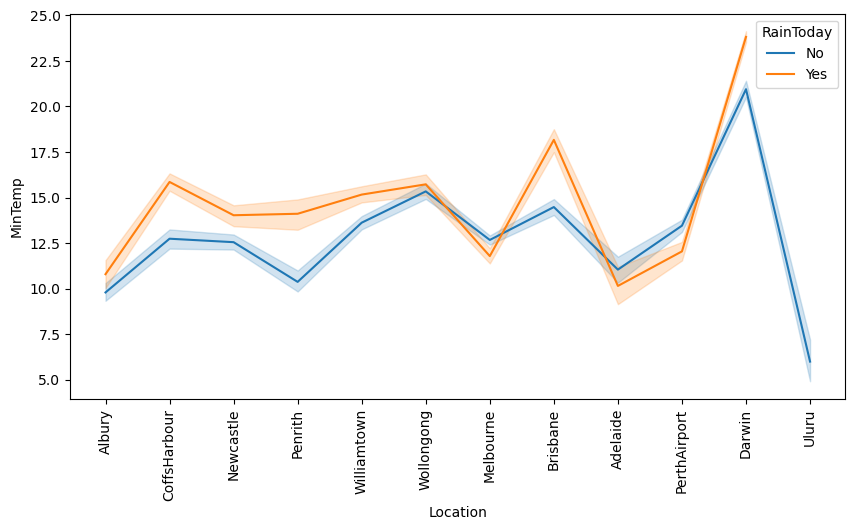

In [51]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(x = df.Location, y = df.MinTemp, hue = df.RainToday);

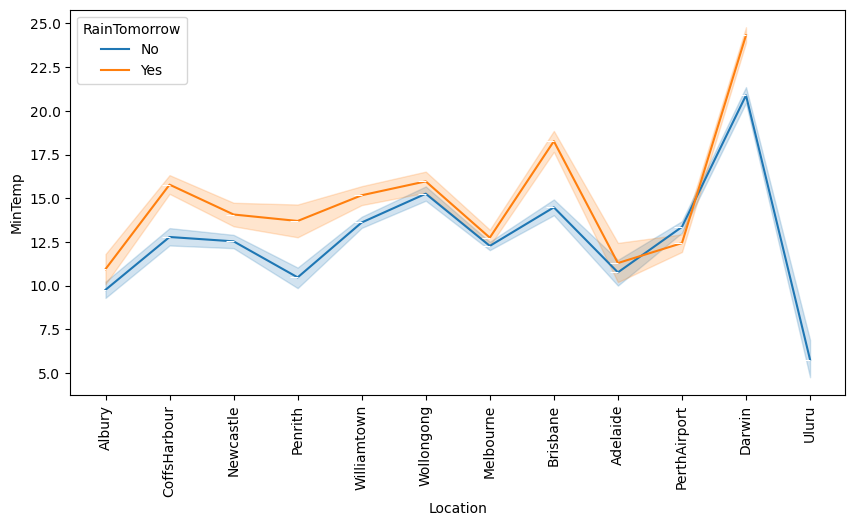

In [52]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(x = df.Location, y = df.MinTemp, hue = df.RainTomorrow, marker = False);

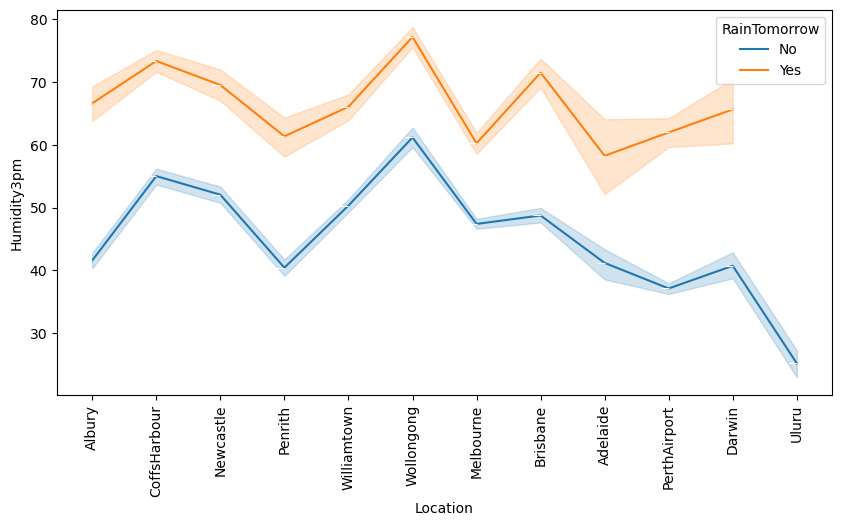

In [53]:
fig = plt.gcf()
fig.set_size_inches((10, 5))
plt.xticks(rotation = 90)

sns.lineplot(x = df.Location, y = df.Humidity3pm, hue = df.RainTomorrow, marker = False);

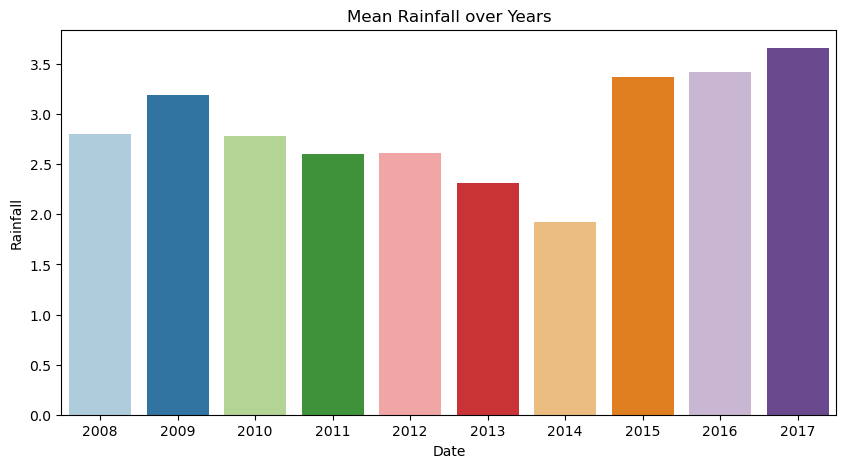

In [54]:
df['Date'] = pd.to_datetime(df['Date'])
RF_year = df.groupby(df['Date'].dt.year)['Rainfall'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.barplot(x = RF_year.index, y = RF_year, 
            palette = sns.color_palette("Paired")).\
            set_title("Mean Rainfall over Years");

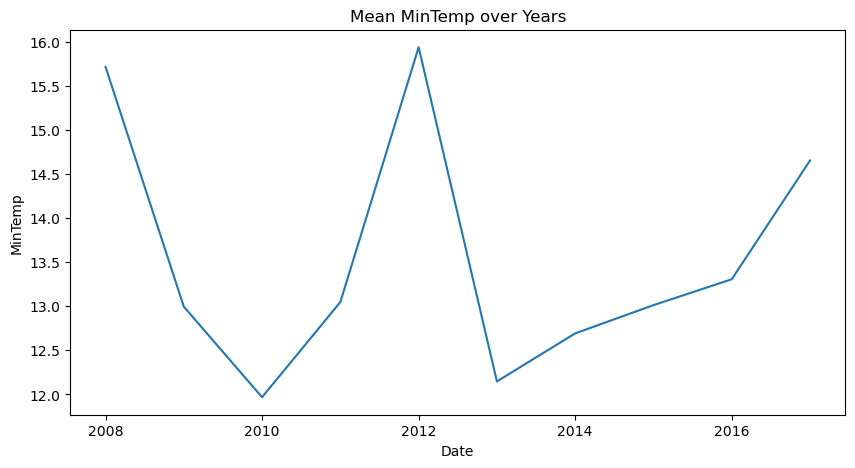

In [55]:
df['Date'] = pd.to_datetime(df['Date'])
MinTemp_year = df.groupby(df['Date'].dt.year)['MinTemp'].mean()

fig = plt.gcf()
fig.set_size_inches((10, 5))

sns.lineplot(x = MinTemp_year.index, y = MinTemp_year,  
            palette = sns.color_palette("Paired")).\
            set_title("Mean MinTemp over Years");

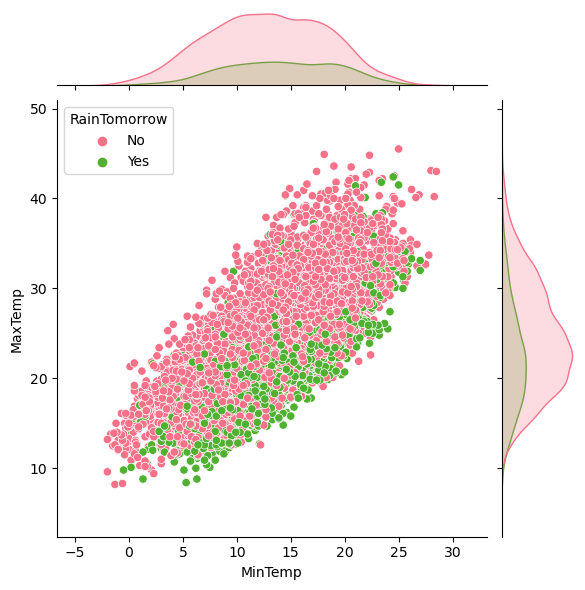

In [56]:
sns.jointplot(x = 'MinTemp', y = 'MaxTemp', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

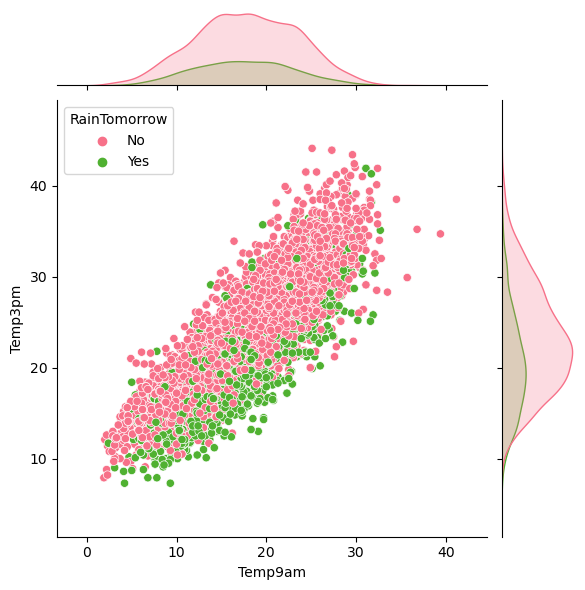

In [57]:
sns.jointplot(x = 'Temp9am', y = 'Temp3pm', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

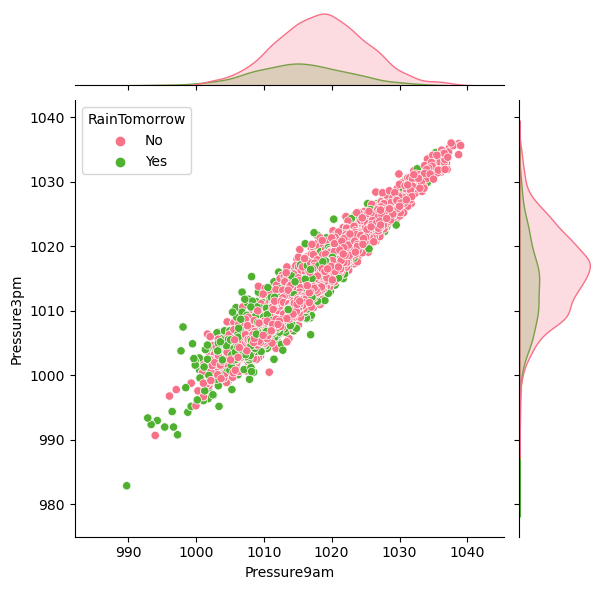

In [58]:
sns.jointplot(x = 'Pressure9am', y = 'Pressure3pm', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

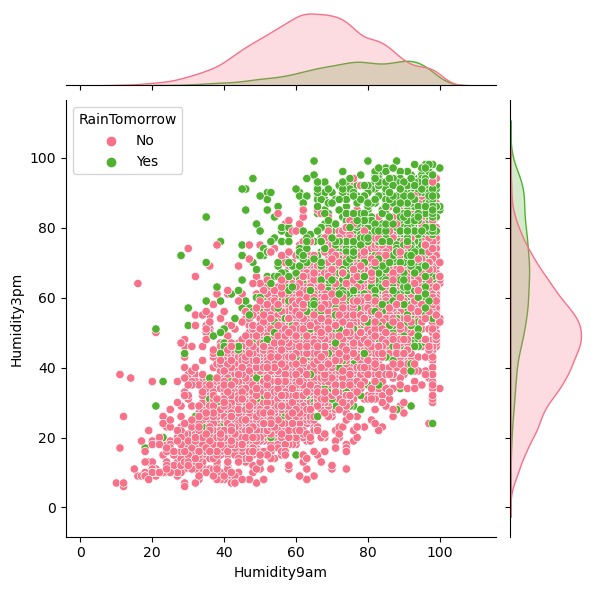

In [59]:
sns.jointplot(x = 'Humidity9am', y = 'Humidity3pm', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

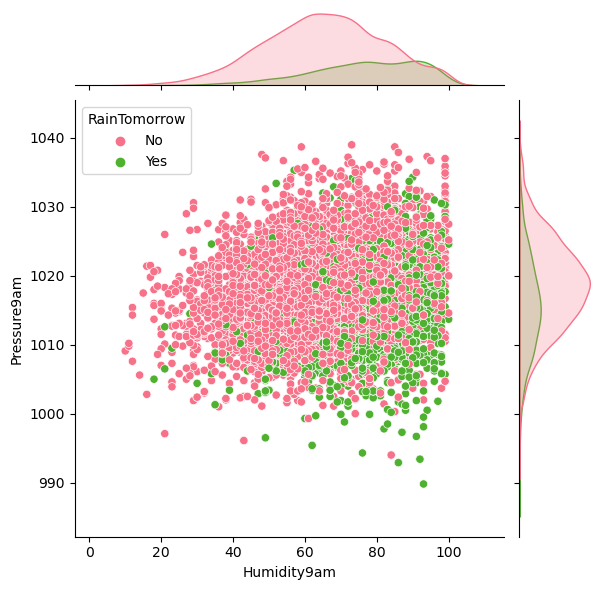

In [60]:
sns.jointplot(x = 'Humidity9am', y = 'Pressure9am', hue = 'RainTomorrow', 
                data = df, palette = [sns.color_palette("husl", 9)[0], 
                                      sns.color_palette("husl", 9)[3]]);

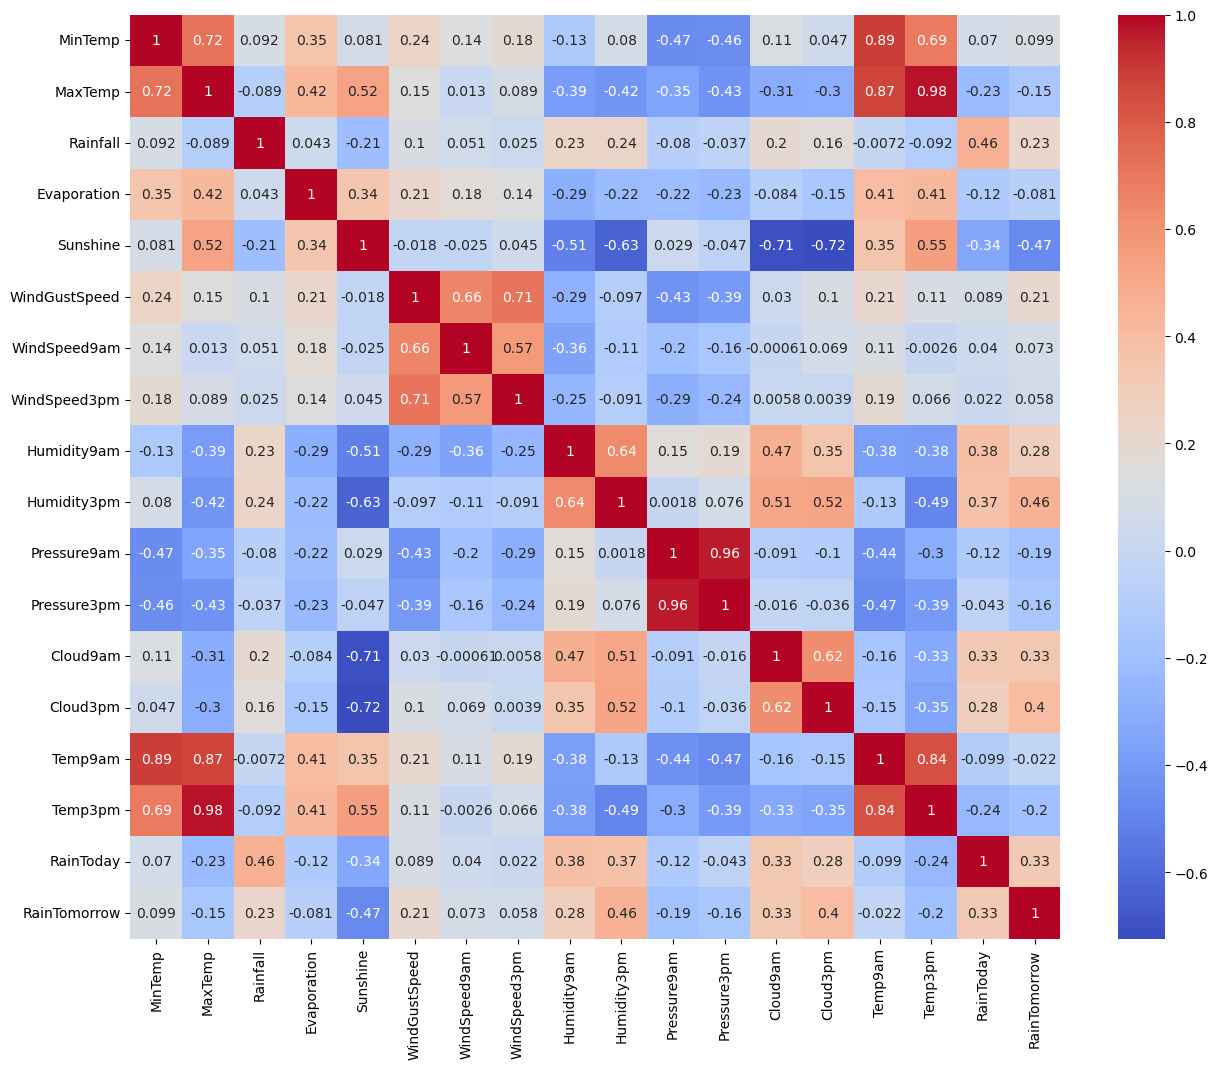

In [61]:
fig = plt.gcf()
fig.set_size_inches((15, 12));

df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace  = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

sns.heatmap(df.corr(), annot = True, cmap = sns.color_palette("coolwarm", as_cmap = True));

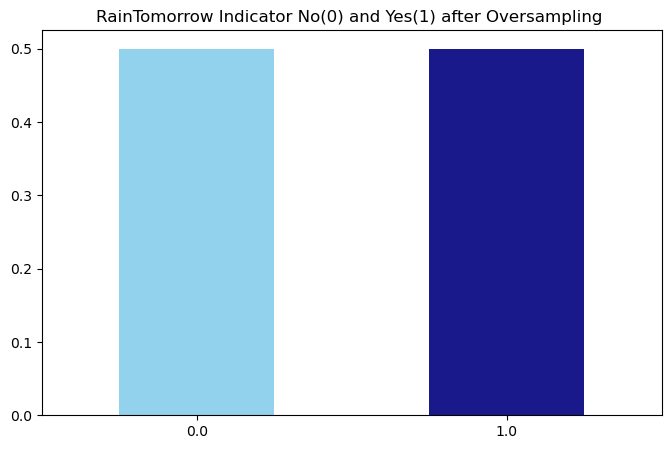

In [62]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df = pd.concat([no, yes_oversampled])


fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling ')
plt.show()

In [63]:
X = df.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = df.iloc[:,-1].values

In [64]:
Y=Y.reshape(-1,1)
Y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [65]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan,strategy='most_frequent') # Fill the missing values with Mode
X = imp.fit_transform(X)
Y = imp.fit_transform(Y)

In [66]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])

le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])

le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])

le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])

le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])

le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [68]:
print(X.shape)
print(Y.shape)

(12390, 19)
(12390, 1)


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0 
maxRS = 0
for i in range(1,40):
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size= 0.30, random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Best accuracy is', maxAccu, 'at random_State', maxRS)

Best accuracy is 0.9636803874092009 at random_State 17


In [70]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, random_state = maxRS)

In [71]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [72]:
# Checking accuracy for RandomForestClasifier

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.962604250739844
[[1769   85]
 [  54 1809]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1854
         1.0       0.96      0.97      0.96      1863

    accuracy                           0.96      3717
   macro avg       0.96      0.96      0.96      3717
weighted avg       0.96      0.96      0.96      3717



In [73]:
# Checking the accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.7775087436104385
[[1504  350]
 [ 477 1386]]
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78      1854
         1.0       0.80      0.74      0.77      1863

    accuracy                           0.78      3717
   macro avg       0.78      0.78      0.78      3717
weighted avg       0.78      0.78      0.78      3717



In [74]:
# Checking accuracy for Support Vector Machine Classifier 

svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8329297820823245
[[1555  299]
 [ 322 1541]]
              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83      1854
         1.0       0.84      0.83      0.83      1863

    accuracy                           0.83      3717
   macro avg       0.83      0.83      0.83      3717
weighted avg       0.83      0.83      0.83      3717



In [75]:
# Checking accuracy for Bagging Classifier 
BC= BaggingClassifier()
BC.fit(x_train, y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test, predBC))

0.9574926015603982
[[1758   96]
 [  62 1801]]
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      1854
         1.0       0.95      0.97      0.96      1863

    accuracy                           0.96      3717
   macro avg       0.96      0.96      0.96      3717
weighted avg       0.96      0.96      0.96      3717



In [76]:
#Checking accuracy for ExtraTreesClassifier 
ET= ExtraTreesClassifier()
ET.fit(x_train, y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.9709443099273608
[[1807   47]
 [  61 1802]]
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      1854
         1.0       0.97      0.97      0.97      1863

    accuracy                           0.97      3717
   macro avg       0.97      0.97      0.97      3717
weighted avg       0.97      0.97      0.97      3717



In [77]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8235135862254507
[[1567  287]
 [ 369 1494]]
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      1854
         1.0       0.84      0.80      0.82      1863

    accuracy                           0.82      3717
   macro avg       0.82      0.82      0.82      3717
weighted avg       0.82      0.82      0.82      3717



In [78]:
ABC = AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.7791229486144741
[[1507  347]
 [ 474 1389]]
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79      1854
         1.0       0.80      0.75      0.77      1863

    accuracy                           0.78      3717
   macro avg       0.78      0.78      0.78      3717
weighted avg       0.78      0.78      0.78      3717



In [79]:
# ExtraTreesClassifier 
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [10,20,30],
              'random_state':[10, 50, 1000],
              'n_jobs':[-2,-1,1],
              'n_estimators':[50,100,200,300]}
GCV= GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [80]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 10}

In [81]:
Final_model = ExtraTreesClassifier(criterion = 'gini', max_depth = 30, n_estimators = 200 , n_jobs = -2, random_state = 10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

97.30965832660749


In [82]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve # this is only for binary 

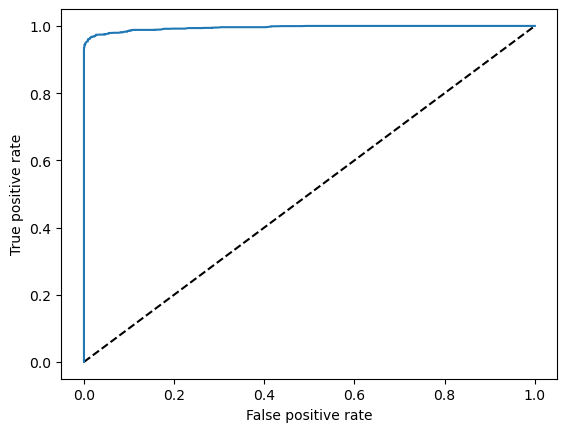

Auc Score:  
 0.9731029397203591


In [83]:
y_pred_prob = Final_model.predict_proba(x_test)[:,1] # we choose one of the two classes
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob) # false positive rate and true positive rate
roc_auc = auc(fpr, tpr) # 

plt.plot([0,1],[0,1],'k--') # k is about the line tipe 
plt.plot(fpr, tpr, label = 'Random Forest Classifier(area=%0.2f)'% roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score = roc_auc_score(y_test, Final_model.predict(x_test))
print('Auc Score: ','\n', auc_score)

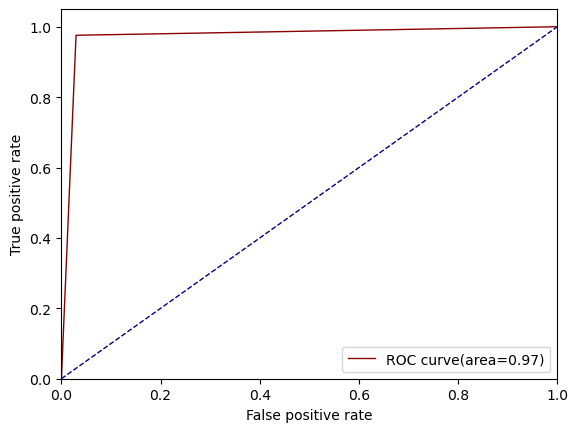

In [84]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkred', lw = 1, label = 'ROC curve(area=%0.2f)'% roc_auc) # the % 

plt.plot([0,1],[0,1], color ='navy', lw = 1, ls = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

In [85]:
import joblib
joblib.dump(Final_model, 'RainfallTomorrow.pkl')

['RainfallTomorrow.pkl']

In [86]:
# lets load the saved model and get the predictions
model = joblib.load('RainfallTomorrow.pkl')

# prediction
prediction = model.predict(x_test)
prediction

array([0., 0., 1., ..., 1., 0., 1.])

In [87]:
a = np.array(y_test) # this is to convert y_test intro array
df = pd.DataFrame({'Predicted':prediction,'Orignial':a})
df

ValueError: Per-column arrays must each be 1-dimensional

In [88]:
conclusion = pd.DataFrame([model.predict(x_test)[:]], index = ['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,3707,3708,3709,3710,3711,3712,3713,3714,3715,3716
Predicted,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
Original,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


In [89]:
df.drop(['Date'],axis = 1, inplace = True)

In [90]:
df.drop(['Location'],axis = 1, inplace = True)

In [102]:
# encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5720,13.9,28.4,0.0,7.0,9.6,61.0,33.0,41.0,52.0,33.0,...,0,0,0,0,0,0,0,0,0,0
6217,19.2,26.6,6.0,3.2,0.9,28.0,2.0,13.0,75.0,52.0,...,0,0,0,0,0,0,0,0,0,0
4725,8.8,18.1,0.8,0.8,4.4,56.0,26.0,28.0,60.0,56.0,...,0,1,0,0,0,0,0,0,0,0
4936,19.6,23.5,23.0,10.0,0.3,35.0,20.0,19.0,89.0,76.0,...,0,0,0,1,0,0,0,0,0,0


In [103]:
x = df.drop(['Rainfall'],axis=1)
y = df['Rainfall']

print(x.shape)
print(y.shape)

(12390, 62)
(12390,)


In [104]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [105]:
y = np.nan_to_num(y)

In [106]:
x = np.nan_to_num(x)

In [107]:
# finding the best Random State 
maxAccu = 0
maxRS = 0
for i in range(0,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .20, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Maximul r2 score is ', maxAccu, ' on Random_state', maxRS)

Maximul r2 score is  0.31077534884705826  on Random_state 63


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = maxRS)

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [109]:
LR = LinearRegression()
RFR = RandomForestRegressor()
knn = KNN()
GBR = GradientBoostingRegressor()
lasso = Lasso()
rd = Ridge()
dtr = DecisionTreeRegressor()

In [110]:
for model in [LR, RFR, knn, GBR, lasso,rd,dtr]:
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    pred_train_df = r2_score(y_train, y_pred_train)
    pred_test_df = r2_score(y_test, y_pred_test)
    
    print(f"model: {model}\nTrain Accuracy: {pred_train_df}\nTest Accuracy: {pred_test_df}\n\n")

model: LinearRegression()
Train Accuracy: 0.22300376557446444
Test Accuracy: 0.18860992157877765


model: RandomForestRegressor()
Train Accuracy: 0.9829349139329636
Test Accuracy: 0.8263829564381056


model: KNeighborsRegressor()
Train Accuracy: 0.7664893418359621
Test Accuracy: 0.5138573065619164


model: GradientBoostingRegressor()
Train Accuracy: 0.7879362958409327
Test Accuracy: 0.7034697951502341


model: Lasso()
Train Accuracy: 0.1697646084386153
Test Accuracy: 0.14477056148475098


model: Ridge()
Train Accuracy: 0.22300104889052608
Test Accuracy: 0.18866942154026567


model: DecisionTreeRegressor()
Train Accuracy: 1.0
Test Accuracy: 0.6075793564755227




In [112]:
Model = RandomForestRegressor()

In [113]:
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score:', r2_score(y_test,pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.82991988856637
Mean Absolute Error: 1.009227199354319
Mean Squared Error: 37.570480688862
Root Mean Squared Error: 6.129476379664253


In [115]:
import joblib
joblib.dump(Model, 'rainfall.pkl')

['rainfall.pkl']

In [116]:
# lets load the saved model and get the predictions
Model = joblib.load('rainfall.pkl')

# prediction
prediction = model.predict(x_test)
prediction

array([0.2, 0.4, 0. , ..., 0. , 0. , 0. ])

In [117]:
a = np.array(y_test) # this is to convert y_test intro array
df = pd.DataFrame({'Predicted':prediction,'Orignial':a})
df

,Predicted,Orignial
0,0.2,0.0
1,0.4,0.4
2,0.0,0.0
3,7.2,7.2
4,0.0,0.0
...,...,...
2473,0.0,0.0
2474,0.4,0.4
2475,0.0,0.0
2476,0.0,0.0


In [118]:
conclusion = pd.DataFrame([model.predict(x_test)[:]], index = ['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477
Predicted,0.2,0.4,0.0,7.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,7.2,0.2,4.6,0.0,0.4,0.0,0.0,0.0
Original,0.2,0.4,0.0,7.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,7.2,0.2,4.6,0.0,0.4,0.0,0.0,0.0
